In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd

df = pd.read_csv('/gdrive/MyDrive/Data Science/adult.data.csv')


In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
(#race_count = 
type(df.groupby('race').count()['age'])


pandas.core.series.Series

In [ ]:
# avg age of men
round(df.groupby(df.sex).mean().loc['Male','age'],1)

39.4

In [ ]:
df.count()[0].loc({'education':'Bachelors'})


32561

In [ ]:
# % of people with bachelor degre
round(df.groupby(df.education).count().loc['Bachelors','age']/df.count()[0],1)


0.2

In [ ]:
normalized_df=(subdf1['age']-subdf1['age'].min()) / (subdf1['age'].max()-subdf1['age'].min())
normalized_df

education
10th            0.080427
11th            0.088032
12th            0.028679
1st-4th         0.013685
5th-6th         0.029723
7th-8th         0.071520
9th             0.046486
Assoc-acdm      0.092621
Assoc-voc       0.125525
Bachelors       0.506411
Doctorate       0.043037
HS-grad         1.000000
Masters         0.181083
Preschool       0.000000
Prof-school     0.057955
Some-college    0.635039
Name: age, dtype: float64

In [ ]:
percent = round(subdf1['age']/ subdf1['age'].sum() * 100, 1).Bachelors
percent
#percent.Bachelors#.loc('Bachelor')

16.6

In [ ]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
df[(df.salary == '>50K') &  ((df.education == 'Bachelors') | (df.education == 'Doctorate') | (df.education == 'Masters'))].count()[0]/df.count()[0]





0.10706059396210191

In [ ]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?

    # with and without `Bachelors`, `Masters`, or `Doctorate`

subdf3 = df[(df.salary == '>50K') &  ((df.education == 'Bachelors') | (df.education == 'Doctorate') | (df.education == 'Masters'))].sum()
round(subdf3['fnlwgt'].sum()/df['fnlwgt'].sum() * 100, 1)

10.6

In [ ]:
    # What percentage of people without advanced education make more than 50K?
subdf4 = df[(df.salary == '>50K') &  ((df.education != 'Bachelors') | (df.education != 'Doctorate') | (df.education != 'Masters'))].sum()
round(subdf4['fnlwgt'].sum()/df['fnlwgt'].sum() * 100, 1)

23.9

In [ ]:
    # What is the minimum number of hours a person works per week (hours-per-week feature)?
df['hours-per-week'].min()

1

In [ ]:
df[(df['hours-per-week'] == df['hours-per-week'].min()) & (df.salary == '>50K')]["fnlwgt"].sum()

185610

In [ ]:
    # What percentage of the people who work the minimum number of hours per week have a salary of >50K?

round((df[(df['hours-per-week'] == df['hours-per-week'].min()) & (df.salary == '>50K')]["fnlwgt"].sum() / df["fnlwgt"].sum()) * 100, 2)


0.0

###Continuamos con el ejercicio de medicina y SEABORN

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd

df2 = pd.read_csv('/gdrive/MyDrive/Data Science/medical_examination.csv')
df2

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
# Add 'overweight' column

#IMC = peso kg / estatura mts **2

df2['overweight'] = df2['weight'] /(0.01*df2['height'])**2
df2['overweight'] = df2['overweight'].apply(lambda x: 1 if x >= 25 else 0)
#df2['overweight3'] = df2['weight'] /(0.01*df2['height'])**2 >= 25
df2

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.


#df2['overweight']




,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [ ]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df2['cholesterol'] = df2['cholesterol'].apply(lambda x: 1 if x != 1 else 0)
df2['gluc'] = df2['gluc'].apply(lambda x: 1 if x != 1 else 0)
df2


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [ ]:
df2

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [ ]:
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

In [ ]:
df3 = df2.melt(id_vars=['cardio'] , value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df3

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [ ]:
df4 = pd.DataFrame(df3.groupby(['variable', 'value', 'cardio'])['value'].count()).rename( columns={'value': 'total'}).reset_index()
#df4 = df4.
df4

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,0,0,29330
9,cholesterol,0,1,23055


In [ ]:
df3['totales'] = df3['value']

In [ ]:
df3['totales'].mask((df3['variable'] == 'overweight') & (df3['value'] == 1) & (df3['cardio'] == 1)\
                    ,df3[(df3['variable'] == 'overweight') & (df3['value'] == 1) & (df3['cardio'] == 1)]['value'].sum(),inplace=True )

In [ ]:
df3['totales'].mask((df3['variable'] == 'cholesterol') & (df3['value'] == 1) & (df3['cardio'] == 1)\
                    ,df3[(df3['variable'] == 'cholesterol') & (df3['value'] == 1) & (df3['cardio'] == 1)]['value'].sum(),inplace=True )

In [ ]:
df3['totales'].mask((df3['variable'] == 'gluc') & (df3['value'] == 1) & (df3['cardio'] == 1)\
                    ,df3[(df3['variable'] == 'gluc') & (df3['value'] == 1) & (df3['cardio'] == 1)]['value'].sum(),inplace=True )

In [ ]:
df3['totales'].mask((df3['variable'] == 'smoke') & (df3['value'] == 1) & (df3['cardio'] == 1)\
                    ,df3[(df3['variable'] == 'smoke') & (df3['value'] == 1) & (df3['cardio'] == 1)]['value'].sum(),inplace=True )

In [ ]:
df3['totales'].mask((df3['variable'] == 'alco') & (df3['value'] == 1) & (df3['cardio'] == 1)\
                    ,df3[(df3['variable'] == 'alco') & (df3['value'] == 1) & (df3['cardio'] == 1)]['value'].sum(),inplace=True )

In [ ]:
df3['totales'].mask((df3['variable'] == 'active') & (df3['value'] == 1) & (df3['cardio'] == 1)\
                    ,df3[(df3['variable'] == 'active') & (df3['value'] == 1) & (df3['cardio'] == 1)]['value'].sum(),inplace=True )

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

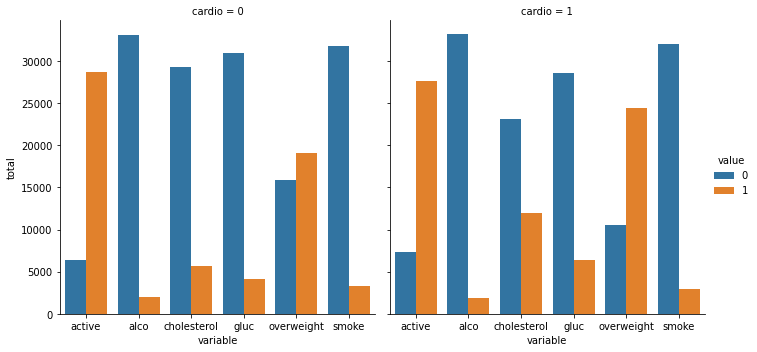

In [ ]:
sns.catplot(x='variable', y="total", hue = 'value', col="cardio", data=df4, kind="bar" )

In [ ]:
fig= sns.catplot(x='variable', y="total", hue = 'value', col="cardio", data=df4, kind="bar" )

In [ ]:
fig.savefig('catplot.png')

In [ ]:
sns.countplot(x="value", hue = 'variable', col="cardio", data=df3)

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
  """  # Clean the data
    df_heat = None

    # Calculate the correlation matrix
    corr = None

    # Generate a mask for the upper triangle
    mask = None



    # Set up the matplotlib figure
    fig, ax = None

    # Draw the heatmap with 'sns.heatmap()'"""
df2


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [ ]:
corr = df2.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.003457,0.003154,-0.003038,-0.001830,0.003356,-0.002529,0.005290,0.002844,-0.003699,0.001210,0.003755,0.003799,-0.000744
age,0.003457,1.000000,-0.022609,-0.081515,0.053684,0.020764,0.017647,0.129697,0.088099,-0.047633,-0.029723,-0.009927,0.238159,0.091941
sex,0.003154,-0.022609,1.000000,0.498221,0.155115,0.005985,0.015195,-0.034729,-0.018318,0.337664,0.170682,0.005991,0.007953,-0.040204
height,-0.003038,-0.081515,0.498221,1.000000,0.290968,0.005488,0.006150,-0.048532,-0.019400,0.187989,0.094419,-0.006570,-0.010821,-0.115025
weight,-0.001830,0.053684,0.155115,0.290968,1.000000,0.030702,0.043710,0.137981,0.120407,0.067780,0.067113,-0.016867,0.181660,0.616418
ap_hi,0.003356,0.020764,0.005985,0.005488,0.030702,1.000000,0.016086,0.024730,0.012886,-0.000922,0.001408,-0.000033,0.054475,0.021258
ap_lo,-0.002529,0.017647,0.015195,0.006150,0.043710,0.016086,1.000000,0.026504,0.013747,0.005186,0.010601,0.004780,0.065719,0.030368
cholesterol,0.005290,0.129697,-0.034729,-0.048532,0.137981,0.024730,0.026504,1.000000,0.383252,0.017839,0.043610,0.005911,0.205536,0.133660
gluc,0.002844,0.088099,-0.018318,-0.019400,0.120407,0.012886,0.013747,0.383252,1.000000,0.002087,0.020606,-0.009061,0.090876,0.096054
smoke,-0.003699,-0.047633,0.337664,0.187989,0.067780,-0.000922,0.005186,0.017839,0.002087,1.000000,0.340094,0.025858,-0.015486,-0.001131


In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

In [ ]:

f, ax = plt.subplots(figsize=(11, 9))


In [ ]:
cmap = sns.diverging_palette(fmt='.1f',vmax=.3, linewidths=.5,square=True,annot=True)


TypeError: ignored

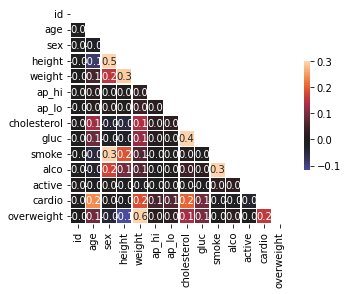

In [ ]:
sns.heatmap(corr, mask=mask, fmt='.1f', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
#fmt='.1f',vmax=.3, linewidths=.5,square=True, cbar_kws = {'shrink':0.5},annot=True, center=0

### ejercicio de sereis temporales curso data analytics


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import numpy as np
register_matplotlib_converters()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
#df

In [ ]:
q_low = df.value.quantile(0.025)
q_hi  = df.value.quantile(0.975)

df = df[(df.value < q_hi) & (df.value > q_low)]

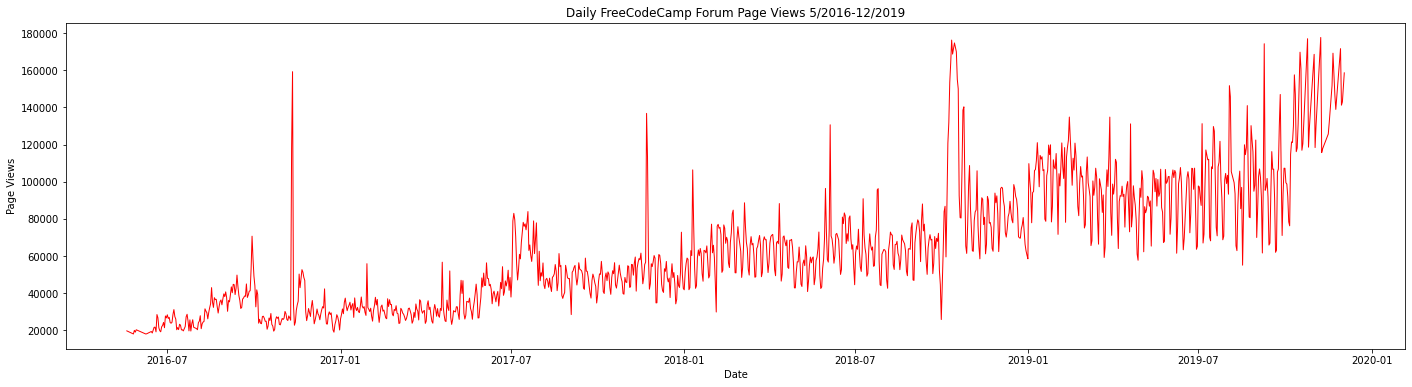

In [ ]:
plt.figure(figsize=(24,6))
plt.title(label = 'Daily FreeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.plot(df, color='red', linewidth=1, linestyle='solid') 

In [ ]:
df.groupby([df.index.year, df.index.month])['value'].mean().unstack()

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


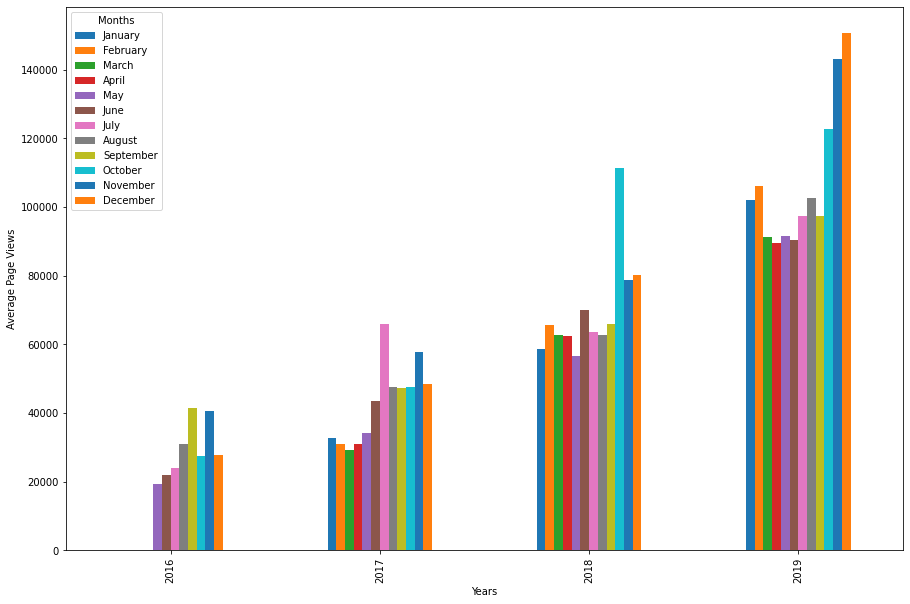

In [ ]:
df_bar= df.groupby([df.index.year, df.index.month])['value'].mean().unstack()
# Draw bar plot
fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
plt.xlabel("Years", fontsize= 10)
plt.ylabel("Average Page Views", fontsize= 10)
#plt.xticks(rotation=30)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.show()

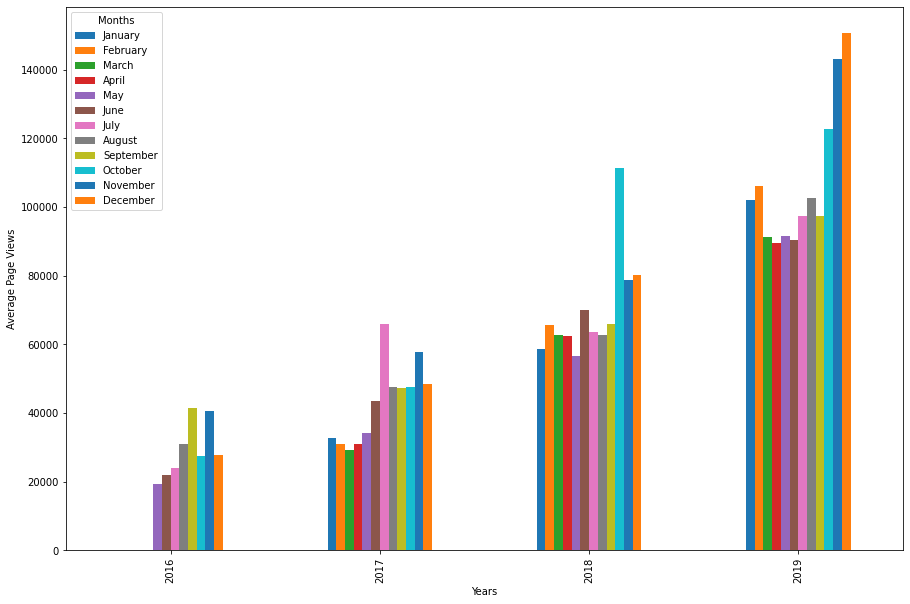

In [ ]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df["month"] = df.index.month
df["year"] = df.index.year
df_bar = df.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()

# Draw bar plot
fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
plt.xlabel("Years", fontsize= 10)
plt.ylabel("Average Page Views", fontsize= 10)
#plt.xticks(rotation=30)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.show()

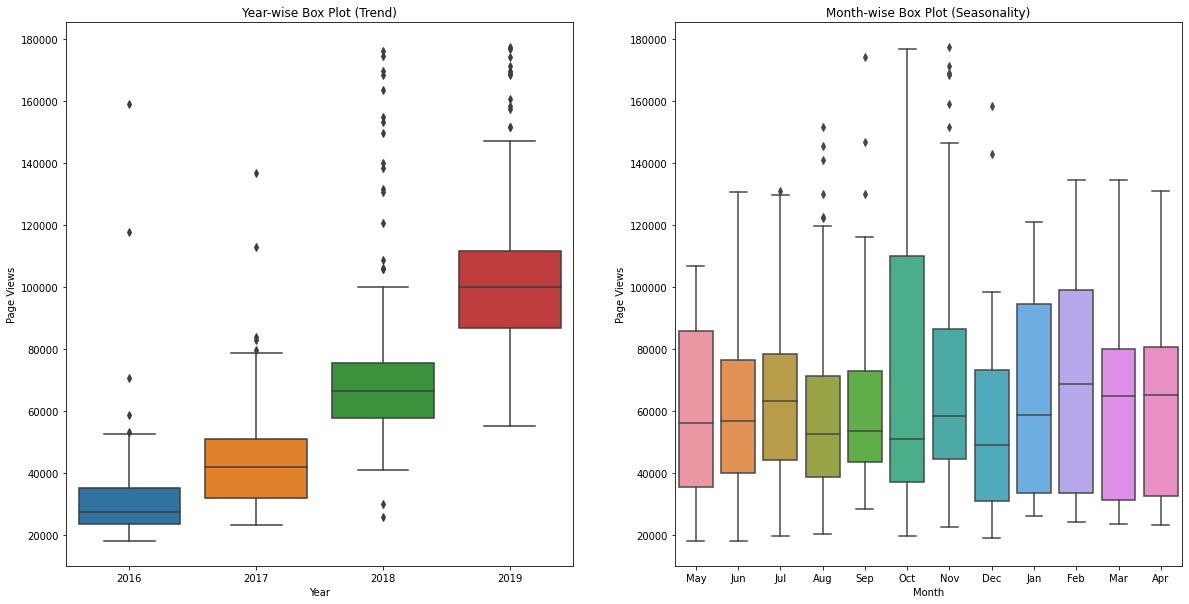

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)

ax1 = sns.boxplot(x=df_box["year"], y=df_box["value"], ax=ax1)
ax1.set_title("Year-wise Box Plot (Trend)") 
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

ax2 = sns.boxplot(x=df_box["month"], y=df_box["value"], ax=ax2)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')

plt.show()

In [ ]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('/gdrive/MyDrive/Data Science/fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
# Clean data
df = df.dropna()

def draw_line_plot():
    # Draw line plot
    
    q_low = df.value.quantile(0.025)
    q_hi  = df.value.quantile(0.975)

    df2 = df[(df.value < q_hi) & (df.value > q_low)]

    plt.figure(figsize=(24,6))
    plt.title(label = 'Daily FreeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.plot(df2, color='red', linewidth=1, linestyle='solid') 

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar= df.groupby([df.index.year, df.index.month])['value'].mean().unstack()
    # Draw bar plot
    fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
    plt.xlabel("Years", fontsize= 10)
    plt.ylabel("Average Page Views", fontsize= 10)
    #plt.xticks(rotation=30)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax1 = sns.boxplot(x=df_box["year"], y=df_box["value"], ax=ax1)
    ax1.set_title("Year-wise Box Plot (Trend)") 
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')

    ax2 = sns.boxplot(x=df_box["month"], y=df_box["value"], ax=ax2)
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


In [ ]:
draw_box_plot()

### predecit see level by 2050

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import numpy as np
register_matplotlib_converters()


In [ ]:
df = pd.read_csv('/gdrive/MyDrive/Data Science/epa-sea-level.csv')
df#.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [ ]:
df.iloc[:,2]

In [ ]:
df.columns[1]

'CSIRO Adjusted Sea Level'

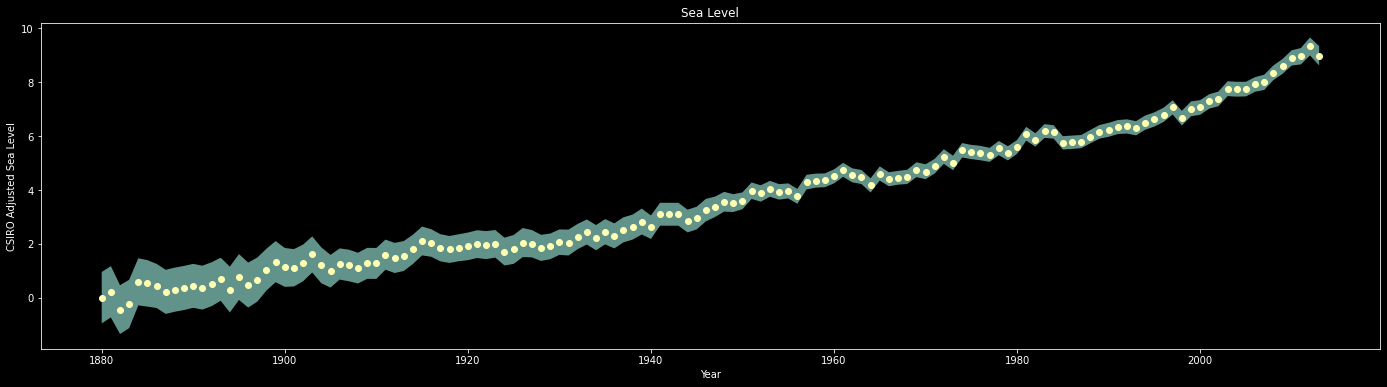

In [ ]:
from os import name
# Create scatter plot

plt.style.use('dark_background')

plt.figure(figsize=(24,6))

plt.fill_between(df.iloc[:,0], df.iloc[:,3], df.iloc[:,2], alpha=0.7, linewidth=0)
plt.scatter(df.iloc[:,0],df.iloc[:,1])
    
plt.title("Sea Level")
plt.xlabel("Year")
plt.ylabel(df.columns[1])

plt.show()


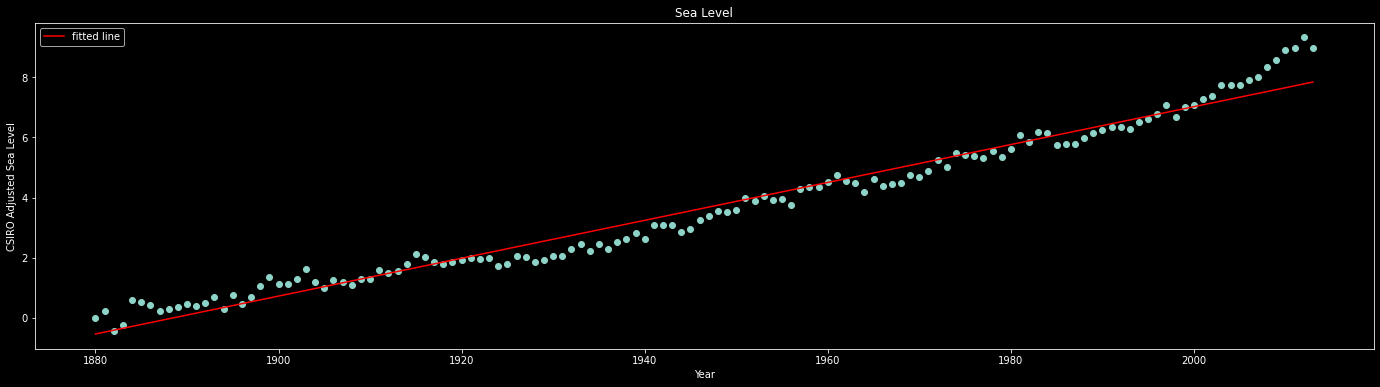

In [ ]:
from scipy import stats

res = stats.linregress(df.iloc[:,0],df.iloc[:,1])

#plt.plot(x, y, 'o', label='original data')
plt.figure(figsize=(24,6))

plt.plot(df.iloc[:,0], res.intercept + res.slope*df.iloc[:,0], 'r', label='fitted line')

plt.scatter(df.iloc[:,0],df.iloc[:,1])
    
plt.title("Sea Level")
plt.xlabel("Year")
plt.ylabel(df.columns[1])

plt.legend()
plt.show()

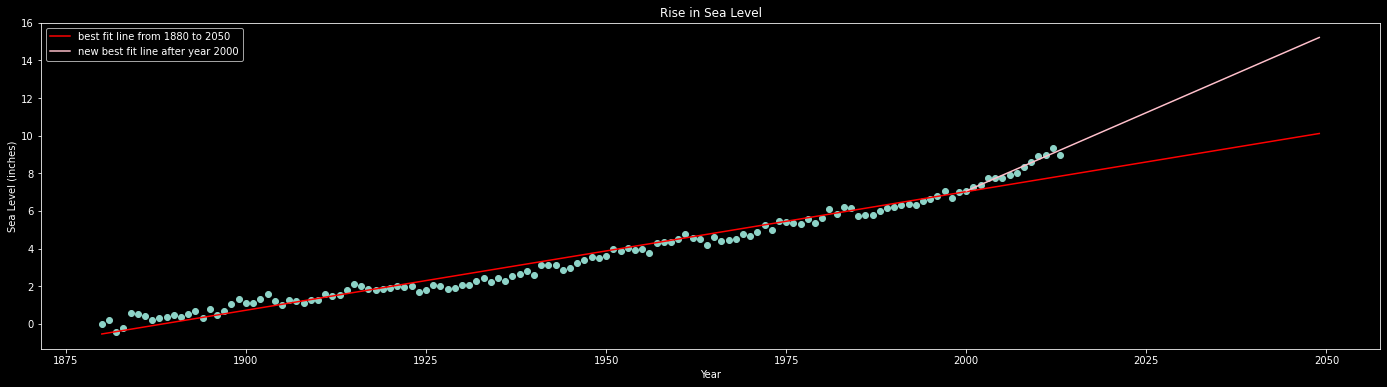

In [ ]:
plt.figure(figsize=(24,6))

plt.scatter(df.iloc[:,0],df.iloc[:,1])
sr1 = pd.Series([int(i) for i in range(1880, 2050)])

# First best line
slope, intercept, r_value, p_value, std_err  = stats.linregress(df['Year'], df["CSIRO Adjusted Sea Level"])
plt.plot(sr1, intercept + slope*sr1, 'r', label='best fit line from 1880 to 2050')

# Second best line after year 2000
recent = df[df['Year'] >= 2000]
slope, intercept, r_value, p_value, std_err  = stats.linregress(recent['Year'], recent["CSIRO Adjusted Sea Level"])

sr2 = pd.Series([int(i) for i in range(2000, 2050)])
recent.append(sr2, ignore_index=True)
plt.plot(sr2, intercept + slope*sr2, 'r', label='new best fit line after year 2000', color="pink")

plt.title("Rise in Sea Level")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.legend()

plt.show()

In [ ]:
def draw_plot():
    # Read data from file
    df = pd.read_csv('/gdrive/MyDrive/Data Science/epa-sea-level.csv')#('epa-sea-level.csv')

    # Create scatter plot
    plt.style.use('dark_background')

    plt.figure(figsize=(24,6))

    plt.fill_between(df.iloc[:,0], df.iloc[:,3], df.iloc[:,2], alpha=0.7, linewidth=0)
    plt.scatter(df.iloc[:,0],df.iloc[:,1])

    # Create first line of best fit
    res = stats.linregress(df.iloc[:,0],df.iloc[:,1])
    plt.plot(df.iloc[:,0], res.intercept + res.slope*df.iloc[:,0], 'r', label='fitted line')

    # Create second line of best fit
    sr1 = pd.Series([int(i) for i in range(1880, 2050)])
    slope, intercept, r_value, p_value, std_err  = stats.linregress(df['Year'], df["CSIRO Adjusted Sea Level"])
    plt.plot(sr1, intercept + slope*sr1, 'r', label='best fit line from 1880 to 2050')

    recent = df[df['Year'] >= 2000]
    slope, intercept, r_value, p_value, std_err  = stats.linregress(recent['Year'], recent["CSIRO Adjusted Sea Level"])

    sr2 = pd.Series([int(i) for i in range(2000, 2050)])
    recent.append(sr2, ignore_index=True)
    plt.plot(sr2, intercept + slope*sr2, 'r', label='new best fit line after year 2000', color="pink")

    # Add labels and title
        
    plt.title("Sea Level")
    plt.xlabel("Year")
    plt.ylabel(df.columns[1])
    plt.show()
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

In [ ]:
draw_plot()